In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


План:
* Работа в контексте проекта
    * Оставить только фичи, что мы рассчитали и фичи с полом, возрастом, ростом, весом, уровнем глюкозы убрав Null
    * Построить гистограммы с полом, возрастом, ростом, весом, уровнем глюкозы
    * Отобразить топ 5 корреляций
    * Убрать аннотационные фичи и раскидать по файлам
* Работа в контексте ВКР
    * Убрать null
    * Сформировать тестовую выборку
    * Построить гистограммы с полом, возрастом, ростом, весом, уровнем глюкозы, распределением по классам для тестовой и обучающей выборок

In [94]:
df_summary = pd.read_csv('unprocessed_dataset_features_calc_gauss_30_als_.csv')
df_summary.loc[df_summary["Наличие диабета"] == 1, "Наличие диабета"] = 2
df_summary = pd.concat([df_summary.iloc[:, 2:45], df_summary.iloc[:, 72:]], axis=1)
df_summary = df_summary.drop(columns=['QT', 'ST', 'PQ', 'P', 'R', 'T']).dropna()
df_summary.loc[df_summary["Пол"] == 1, "Пол"] = 'Мужчина'
df_summary.loc[df_summary["Пол"] == 2, "Пол"] = 'Женщина'
df_summary.loc[df_summary["Наличие диабета"] == 2, "Наличие диабета"] = 'наличие НУО'
df_summary.loc[df_summary["Наличие диабета"] == 0, "Наличие диабета"] = 'отсутствие НУО'
df_summary.loc[df_summary["Пол"] == 2, "Пол"] = 'Женщина'
df_summary.rename(columns={"Наличие диабета": 'Наличие НУО'}, inplace=True)
# df_summary = pd.concat([df_summary.iloc[:, 2:45], df_summary.iloc[:, 72:]], axis=1).dropna()

In [95]:
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 2918
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Наличие НУО               2747 non-null   object 
 1   Уровень глюкозы, ммоль/л  2747 non-null   float64
 2   Возраст, лет              2747 non-null   int64  
 3   Вес, кг                   2747 non-null   int64  
 4   Рост, см                  2747 non-null   int64  
 5   Пол                       2747 non-null   object 
 6   SDNN                      2747 non-null   float64
 7   Skewness                  2747 non-null   float64
 8   AMo                       2747 non-null   float64
 9   SWAI                      2747 non-null   float64
 10  Mo                        2747 non-null   float64
 11  dRR                       2747 non-null   float64
 12  RRNN                      2747 non-null   float64
 13  pNN50                     2747 non-null   float64
 14  SI      

<Axes: >

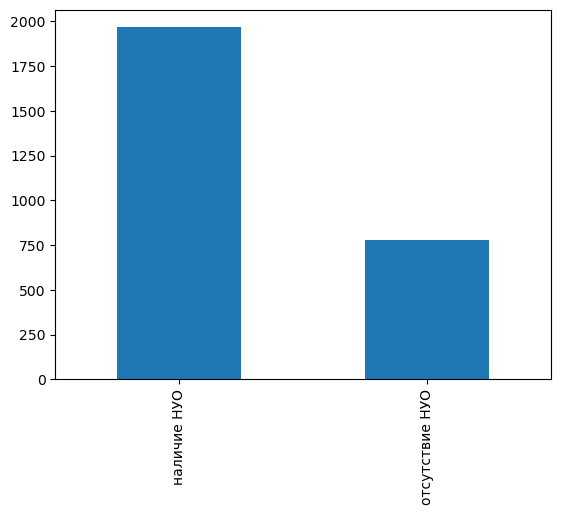

In [124]:
df_summary['Наличие НУО'].value_counts().plot(kind='bar')

In [97]:
df_test = df_summary[df_summary['Площадка'] == 'поликлиника']
df_train = df_summary[df_summary['Площадка'].isin(['ГКБ', 'МКНЦ'])]

array([[<Axes: title={'center': 'Уровень глюкозы, ммоль/л'}>,
        <Axes: title={'center': 'Возраст, лет'}>],
       [<Axes: title={'center': 'Вес, кг'}>,
        <Axes: title={'center': 'Рост, см'}>]], dtype=object)

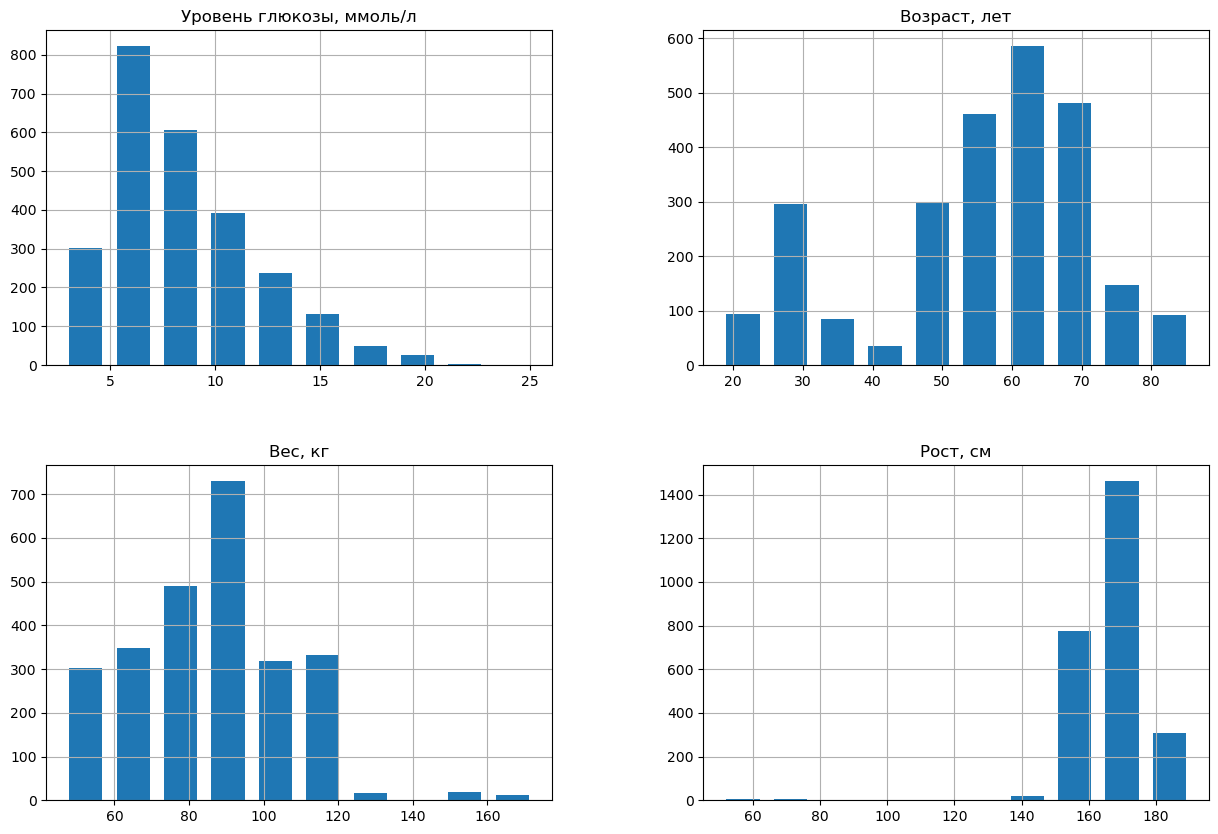

In [102]:
df_train.loc[:, ['Уровень глюкозы, ммоль/л', 'Возраст, лет', 'Вес, кг', 'Рост, см']].hist(figsize=(15, 10), rwidth=0.7)

C:\Users\masli\AppData\Local\Temp\ipykernel_20676\637403109.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


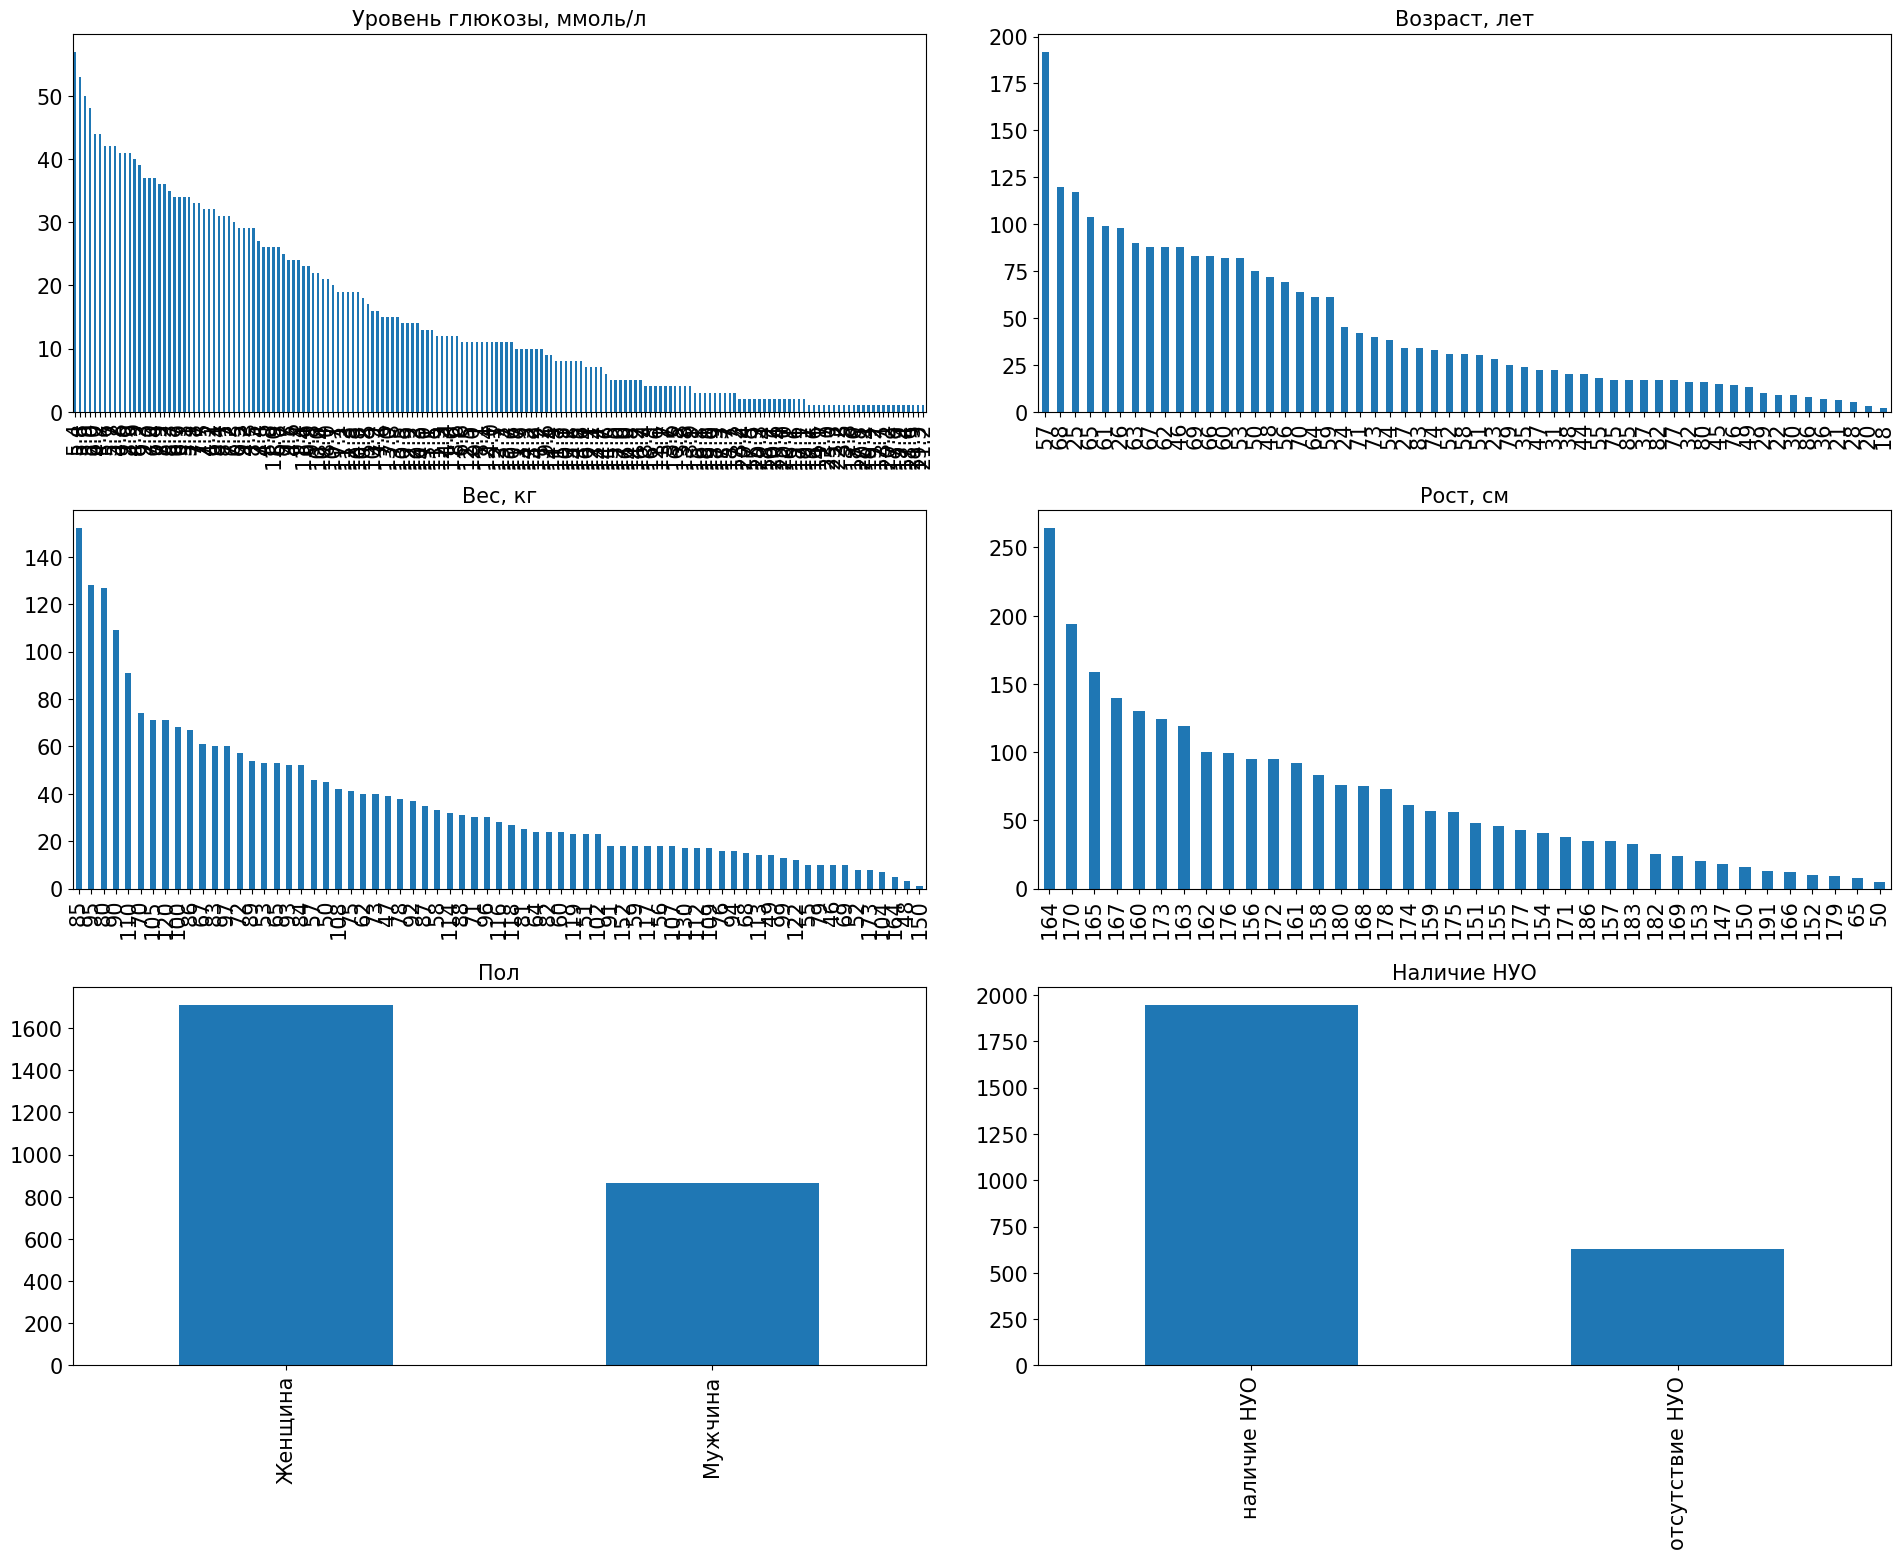

In [117]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
fig.tight_layout(pad=5.0)
cols = ['Уровень глюкозы, ммоль/л', 'Возраст, лет', 'Вес, кг', 'Рост, см', 'Пол', 'Наличие НУО']
for i, feature in enumerate(cols):
    df_train[feature].value_counts().plot(kind='bar', ax=ax[i//2, i%2], fontsize=15)
    ax[i//2, i%2].set_title(feature, size=15)
fig.show()

array([[<Axes: title={'center': 'Уровень глюкозы, ммоль/л'}>,
        <Axes: title={'center': 'Возраст, лет'}>],
       [<Axes: title={'center': 'Вес, кг'}>,
        <Axes: title={'center': 'Рост, см'}>]], dtype=object)

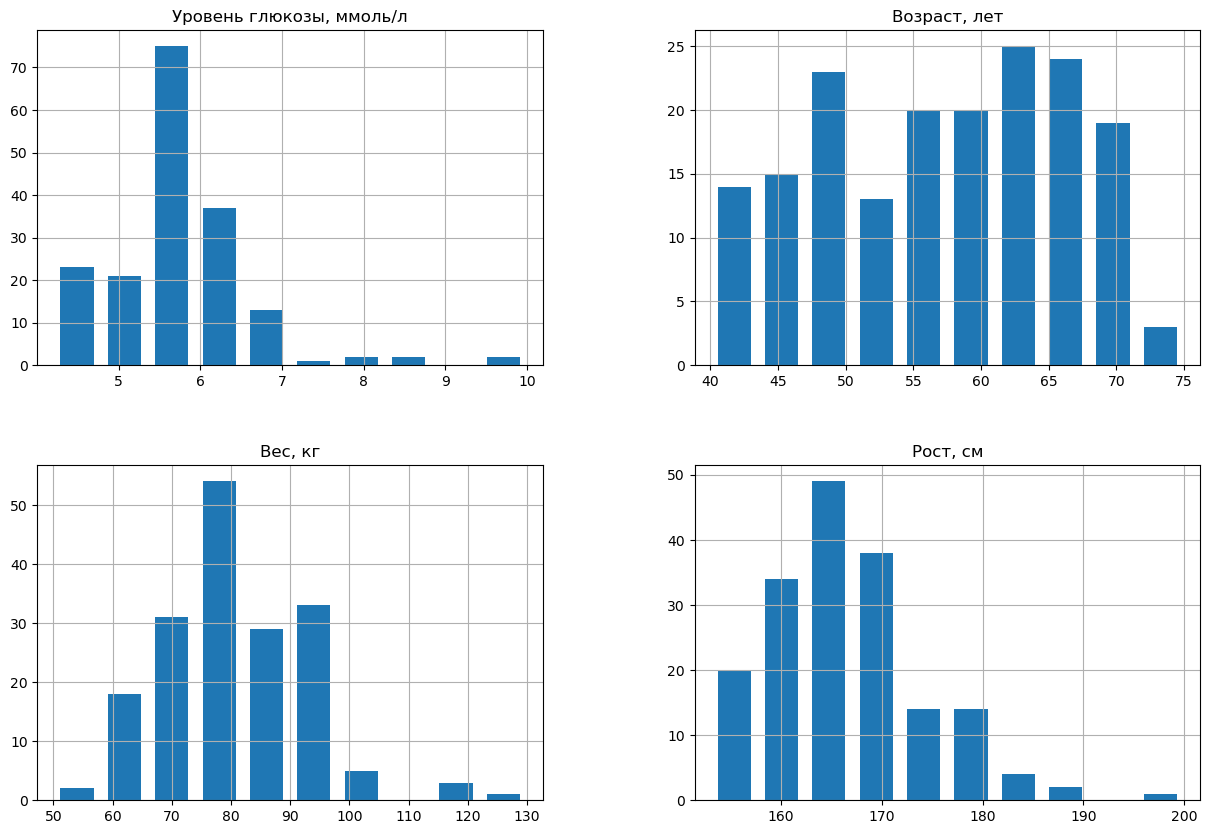

In [104]:
df_test.loc[:, ['Уровень глюкозы, ммоль/л', 'Возраст, лет', 'Вес, кг', 'Рост, см']].hist(figsize=(15, 10), rwidth=0.7)

C:\Users\masli\AppData\Local\Temp\ipykernel_20676\3280248081.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


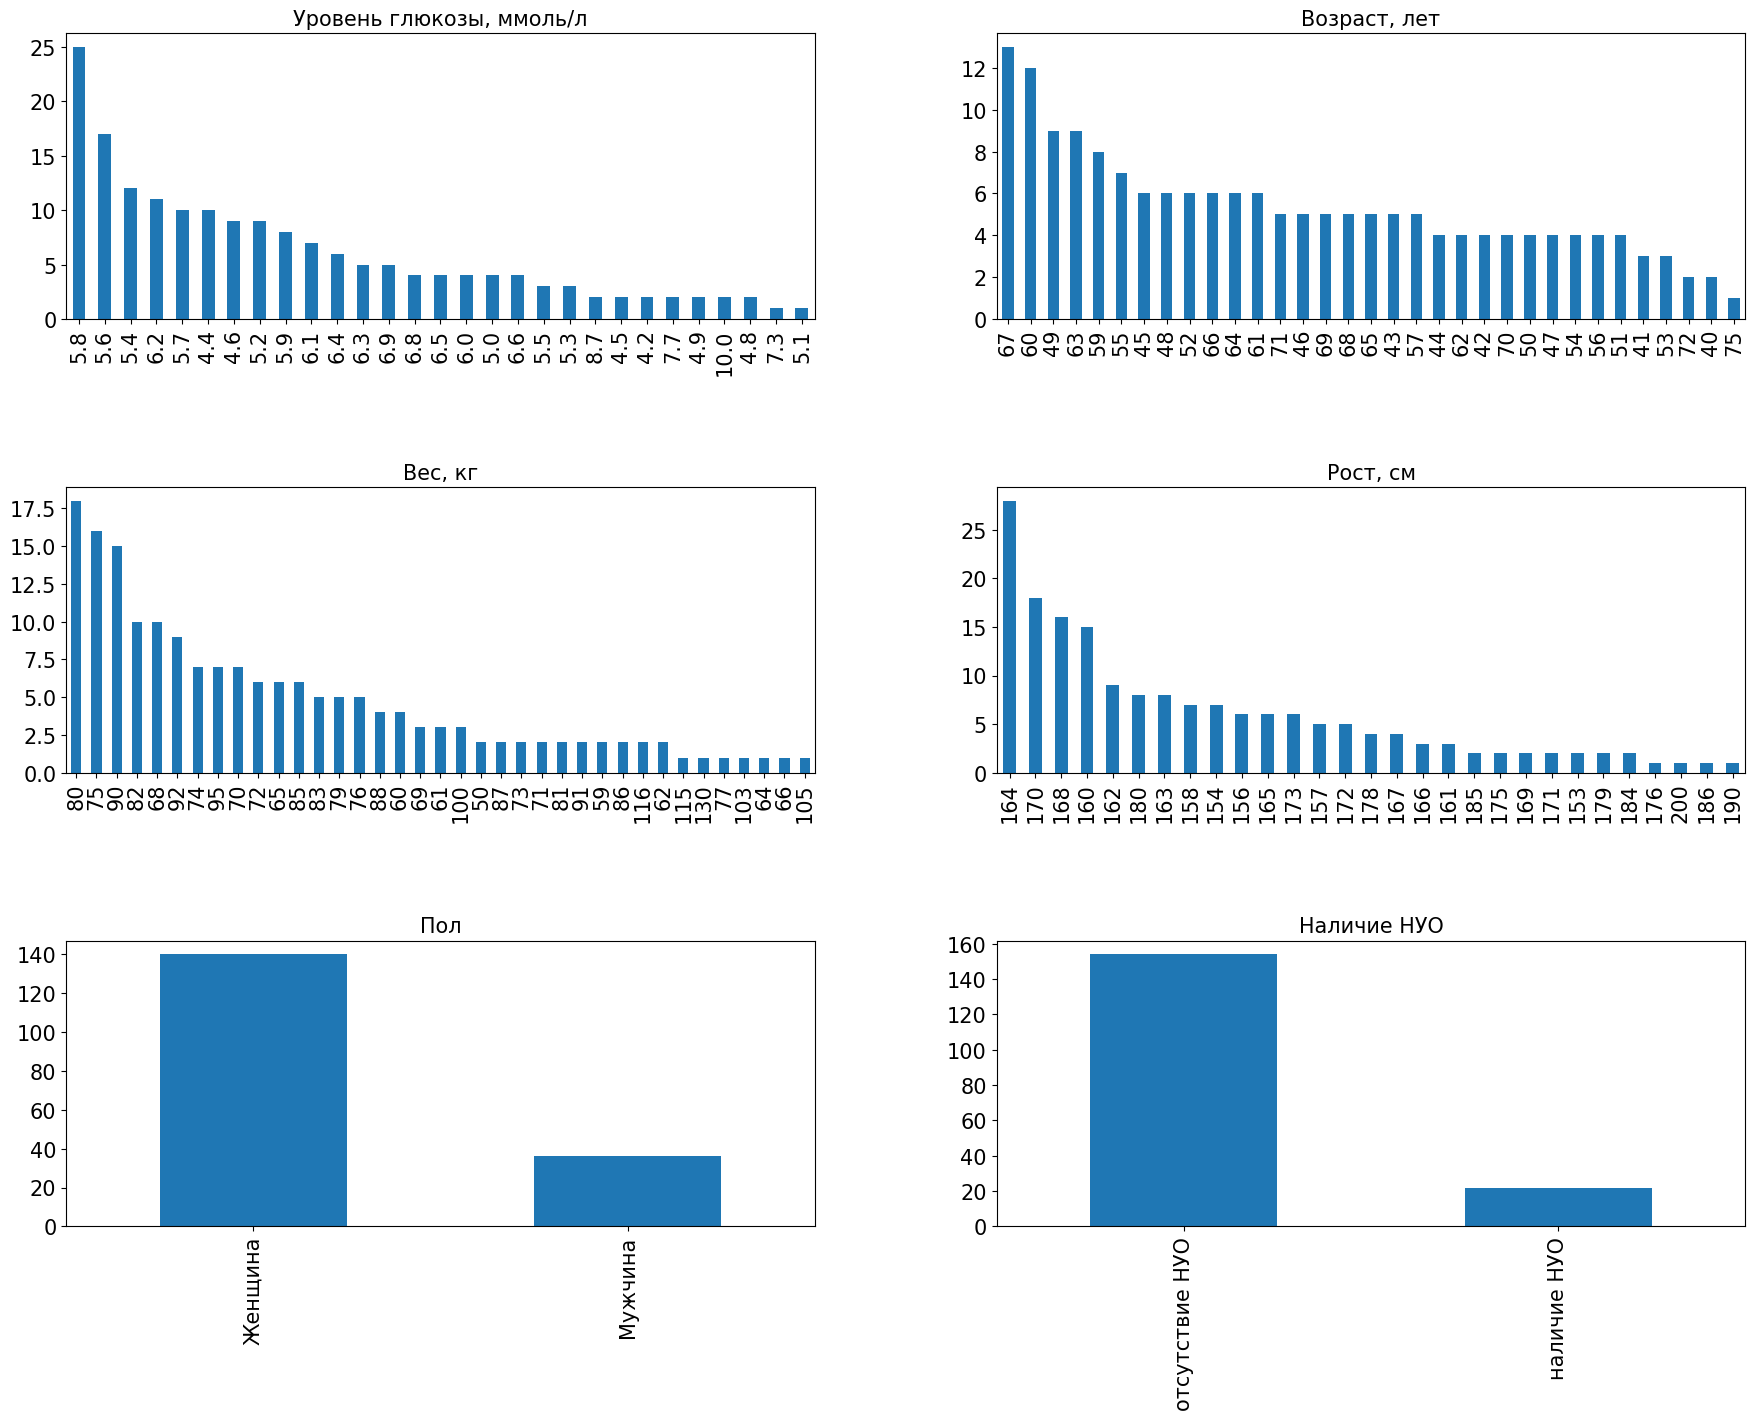

In [115]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
fig.tight_layout(pad=10.0)
cols = ['Уровень глюкозы, ммоль/л', 'Возраст, лет', 'Вес, кг', 'Рост, см', 'Пол', 'Наличие НУО']
for i, feature in enumerate(cols):
    df_test[feature].value_counts().plot(kind='bar', ax=ax[i//2, i%2], fontsize=15)
    ax[i//2, i%2].set_title(feature, size=15)
fig.show()

In [127]:
df_train.to_csv('train.csv', index=False)

In [128]:
df_test.to_csv('test.csv', index=False)